In [57]:
import pandas as pd
from surprise import Dataset,KNNBasic,Reader,accuracy
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD

In [58]:
data = pd.read_csv('./recsys_data/ratings_small.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5))
dataset = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

### This part is about "Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation"

In [59]:
algo_list = ["PMF","User CF","Item CF"]

In [60]:
sim_options_user = {
    'user_based': True,
}
sim_options_item = {
    'user_based': False,
}

In [61]:
number_Neighbors = 10
for algorithm in algo_list:
    if algorithm == "PMF":
        algo = SVD(biased=False)
        result = cross_validate(algo=algo,data=dataset,measures=["rmse", "mae"],cv=5,verbose=False)
        avg_mae = result['test_mae'].mean()
        avg_rmse = result['test_rmse'].mean()
        print("PMF:average MAE is{},average RMSE is{}.".format(avg_mae,avg_rmse))
    elif algorithm == "User CF":
        algo = KNNBasic(k=number_Neighbors,sim_options=sim_options_user,verbose=True)
        result = cross_validate(algo=algo,data=dataset,measures=["rmse", "mae"],cv=5,verbose=False)
        avg_mae = result['test_mae'].mean()
        avg_rmse = result['test_rmse'].mean()
        print("User CF:average MAE is{},average RMSE is{}.".format(avg_mae,avg_rmse))
    elif algorithm == "Item CF":
        algo = KNNBasic(k=number_Neighbors,sim_options=sim_options_item,verbose=True)
        result = cross_validate(algo=algo,data=dataset,measures=["rmse", "mae"],cv=5,verbose=False)
        avg_mae = result['test_mae'].mean()
        avg_rmse = result['test_rmse'].mean()
        print("Item CF:average MAE is{},average RMSE is{}.".format(avg_mae,avg_rmse))

PMF:average MAE is0.7772661272150627,average RMSE is1.0066655244714724.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
User CF:average MAE is0.7391516340513574,average RMSE is0.9652474823431673.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Item CF:average MAE is0.7544921770854092,average RMSE is0.9750531295171883.


### This part is about "Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering"

In [63]:
#user based 
sim_options_cosine_user = {
    'name': 'cosine',
    'user_based': True,
}

sim_options_msd_user = {
    'name': 'msd',
    'user_based': True,
}

sim_options_pearson_user = {
    'name': 'pearson',
    'user_based': True,
}
# item based
sim_options_cosine_item = {
    'name': 'cosine',
    'user_based': False,
}

sim_options_msd_item = {
    'name': 'msd',
    'user_based': False,
}

sim_options_pearson_item = {
    'name': 'pearson',
    'user_based': False,
}

In [64]:
valid_list_user = [sim_options_cosine_user,sim_options_msd_user,sim_options_pearson_user]
valid_list_item = [sim_options_cosine_item,sim_options_msd_item,sim_options_pearson_item]
user_cf_mae = []
user_cf_rmse = []
item_cf_mae = []
item_cf_rmse = []


In [65]:
import matplotlib.pyplot as plt
algo_list2 = ["User CF","Item CF"]


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


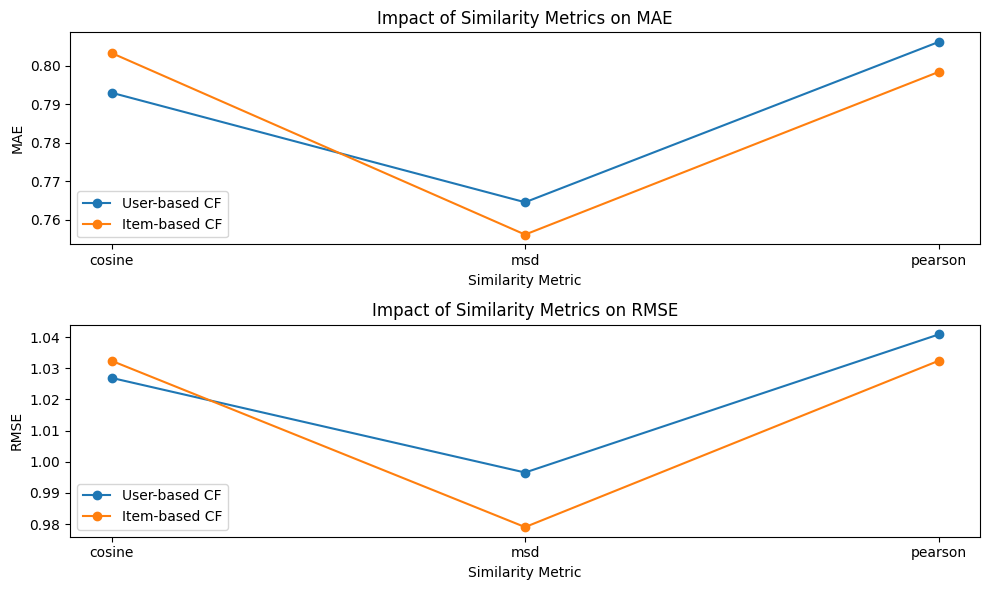

In [66]:
for algorithm in algo_list2:
    if algorithm == "User CF":
        for _,valid_type in enumerate(valid_list_user):
            algo = KNNBasic(k=number_Neighbors,sim_options=valid_type,verbose=True)
            result = cross_validate(algo=algo,data=dataset,measures=["rmse", "mae"],cv=2,verbose=False)
            avg_mae = result['test_mae'].mean()
            user_cf_mae.append(avg_mae)
            avg_rmse = result['test_rmse'].mean()
            user_cf_rmse.append(avg_rmse)
            
    elif algorithm == "Item CF":
        for _,valid_type in enumerate(valid_list_item):
            algo = KNNBasic(k=number_Neighbors,sim_options=valid_type,verbose=True)
            result = cross_validate(algo=algo,data=dataset,measures=["rmse", "mae"],cv=2,verbose=False)
            avg_mae = result['test_mae'].mean()
            item_cf_mae.append(avg_mae)
            avg_rmse = result['test_rmse'].mean()
            item_cf_rmse.append(avg_rmse)
sim_metric = ["cosine","msd","pearson"]
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(sim_metric, user_cf_mae, marker='o', label='User-based CF')
plt.plot(sim_metric, item_cf_mae, marker='o', label='Item-based CF')
plt.title('Impact of Similarity Metrics on MAE')
plt.xlabel('Similarity Metric')
plt.ylabel('MAE')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sim_metric, user_cf_rmse, marker='o', label='User-based CF')
plt.plot(sim_metric, item_cf_rmse, marker='o', label='Item-based CF')
plt.title('Impact of Similarity Metrics on RMSE')
plt.xlabel('Similarity Metric')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()



### This part is about "Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering"

In [52]:
sim_options_user = {
    'user_based': True,
}
sim_options_item = {
    'user_based': False,
}
user_cf_mae = []
user_cf_rmse = []
item_cf_mae = []
item_cf_rmse = []

In [53]:
for number_Neighbors in range(0,50):
    algo_user = KNNBasic(k=number_Neighbors,sim_options=sim_options_user,verbose=False)
    result_user = cross_validate(algo=algo_user,data=dataset,measures=["rmse", "mae"],cv=3,verbose=False)
    avg_mae_user = result_user['test_mae'].mean()
    user_cf_mae.append(avg_mae_user)
    avg_rmse_user = result_user['test_rmse'].mean()
    user_cf_rmse.append(avg_rmse_user)
            
    algo_item = KNNBasic(k=number_Neighbors,sim_options=sim_options_item,verbose=False)
    result_item = cross_validate(algo=algo_item,data=dataset,measures=["rmse", "mae"],cv=3,verbose=False)
    avg_mae_item = result_item['test_mae'].mean()
    item_cf_mae.append(avg_mae_item)
    avg_rmse_item = result_item['test_rmse'].mean()
    item_cf_rmse.append(avg_rmse_item)


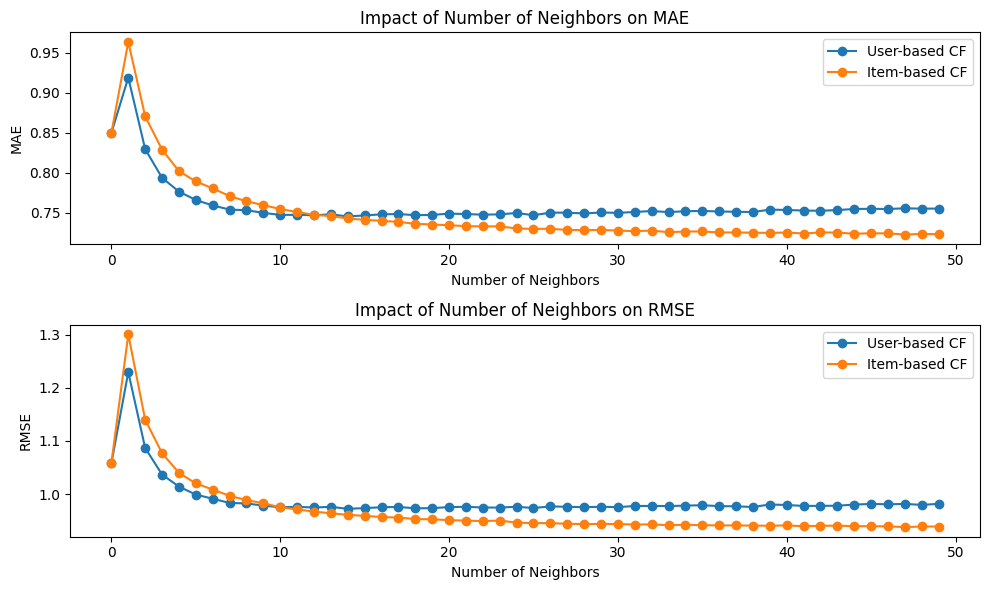

In [54]:
number_neighbor = range(0,50)
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(number_neighbor, user_cf_mae, marker='o', label='User-based CF')
plt.plot(number_neighbor, item_cf_mae, marker='o', label='Item-based CF')
plt.title('Impact of Number of Neighbors on MAE')
plt.xlabel('Number of Neighbors')
plt.ylabel('MAE')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(number_neighbor, user_cf_rmse, marker='o', label='User-based CF')
plt.plot(number_neighbor, item_cf_rmse, marker='o', label='Item-based CF')
plt.title('Impact of Number of Neighbors on RMSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()